# Utility Assistant Dataset - Increasing Funding 

### 🛑 Because the dataset contains real client names and information. This notebook is public, hence some of the code are commented out so no df containing the client name will be printed. 

Data that needs to be in clean in **Excel**:

* birthday data type
* birthday entered wrong (eg: 1/1/5674, 12-5/1968, 123/2/1970)
* birthday not completed
* spell out birthday month
* number stored as object or the number is stored as text (use =value()) to convert back. Use =IF(AK2="","",VALUE(AK2)) to convert to float number in excel if containing NaN in rows. 
* extremely high monthly income 
* negative birthday
* negative income
* find all and replace to fix spelling in the utility company columns
* turn name into cap for first letter using =proper
* grab the year off birthday using =TEXT(cell, "yyyy")
* use =LEFT() or =RIGHT() to grab the specific number for household size-long

# Data Cleaning and EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_excel('/content/ceap.xlsx')

In [ ]:
# Convert birthday into datetime

df['Applicant Birthday'] = pd.to_datetime(df['Applicant Birthday'])
df['Household Member 2 - Birthday'] = pd.to_datetime(df['Household Member 3 - Birthday'])
df['Household Member 3 - Birthday'] = pd.to_datetime(df['Household Member 3 - Birthday'])
df['Household Member 4 - Birthday'] = pd.to_datetime(df['Household Member 4 - Birthday'])

In [9]:
# Original: 1608 rows and 48 columns

df.shape

(1608, 48)

In [10]:
# Data type conversion in Python (for datetime) and in Excel using =value()

df.dtypes

Submission Date                                object
Zip Code                                       object
Applicant Name                                 object
Applicant Birthday                             object
Birth Year                                    float64
Applicant Age                                 float64
Applicant Gender                               object
Applicant Race and Ethnicity                   object
Household Size-Long                            object
Household Size                                float64
Owner/Renter                                   object
Type Of House                                  object
Mortgage/Rent                                 float64
US Citizen                                     object
Income                                         object
Your Income Source                             object
Monthly Pretax Income                         float64
Electricity Provider                           object
Household Member 2 - Name   

In [11]:
# Numerical data description. Use this to look for extremely outliers.

df.describe()

,Birth Year,Applicant Age,Household Size,Mortgage/Rent,Monthly Pretax Income,Birth Year - 2,Household Member 2 - Age,Household Member 2 - Monthly Pretax Income,Birth Year - 3,Household Member 3 - Age,Household Member 3 - Monthly Pretax Income,Birth Year - 4,Household Member 4 - Age,Household Member 4 - Monthly Pretax Income
count,1604.000000,1604.000000,1605.000000,1607.000000,1597.000000,720.000000,721.000000,719.000000,130.000000,127.000000,129.000000,59.000000,63.000000,65.000000
mean,1947.616584,73.285536,1.585047,298.627162,745.237589,1956.670833,63.386963,478.533435,1997.523077,22.767717,159.602248,2008.576271,12.142857,70.769231
std,13.168878,13.153426,0.805855,364.242168,681.458283,19.732318,19.868265,597.389688,20.346691,20.029422,389.667877,10.282565,10.523180,301.414933
min,1916.000000,23.000000,1.000000,0.000000,0.000000,1924.000000,0.500000,0.000000,1933.000000,1.000000,0.000000,1960.000000,0.000000,0.000000
25%,1939.000000,68.000000,1.000000,0.000000,572.500000,1945.000000,61.000000,0.000000,1990.000000,9.500000,0.000000,2004.000000,4.000000,0.000000
50%,1946.000000,75.000000,1.000000,182.000000,793.700000,1951.000000,70.000000,435.500000,2003.000000,18.000000,0.000000,2010.000000,11.000000,0.000000
75%,1953.000000,82.000000,2.000000,477.685000,814.000000,1959.000000,76.000000,600.000000,2011.000000,29.000000,0.000000,2016.000000,16.000000,0.000000
max,1998.000000,105.000000,5.000000,4000.000000,11136.000000,2021.000000,94.000000,7300.000000,2020.000000,88.000000,2000.000000,2020.000000,61.000000,1700.000000


In [12]:
# Missing values
# For the main applicants, we have less than 2.5% missing data. Because not all applicants have family members, it's natural to see much higher missing data % for family member 2,3 and 4. 

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)

,percent_missing
Birth Year - 4,96.330846
Household Member 4 - Age,96.082090
Household Member 4 - Income Source,95.957711
Household Member 4 - Monthly Pretax Income,95.957711
Household Member 4 - Income,95.957711
Household Member 4 - Birthday,95.957711
Household Member 4 - Race,95.957711
Household Member 4 - Gender,95.957711
Household Member 4 - Citizen,95.957711
Household Member 4 - Name,95.957711


In [13]:
# Duplicated rows. Because an applicant can have same name and birthday. I incoporated more columns so that I'm more certain it's the same applicant.

duplicate_rows = df[df.duplicated(subset=['Applicant Name','Applicant Birthday','Applicant Gender','Applicant Age', 'Zip Code', 
                                          'Applicant Race and Ethnicity', 'US Citizen', 'Household Size', 'Income', 'Owner/Renter','Electricity Provider'], keep='first')]


#duplicate_rows

In [14]:
# Drop the duplicated rows and reset the index

df.drop_duplicates(subset=['Applicant Name','Applicant Birthday','Applicant Gender','Applicant Age', 'Zip Code', 
                                          'Applicant Race and Ethnicity', 'US Citizen', 'Household Size', 'Income', 'Owner/Renter','Electricity Provider'], keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)
#df.head(5)


In [15]:
# Gender group and their average age

df.groupby('Applicant Gender')[['Applicant Gender', 'Applicant Age']].mean()

,Applicant Age
Applicant Gender,
Female,71.632895
Male,74.930535


In [18]:
# Obtain the gross household income from all family members

df["household_income"] = df[["Monthly Pretax Income", "Household Member 2 - Monthly Pretax Income","Household Member 3 - Monthly Pretax Income","Household Member 4 - Monthly Pretax Income"]].sum(axis=1)
df["household_income"]

df.rename(columns={'household_income':'Household Income'}, inplace=True)

In [19]:
#Check household income based on household sizes

df.groupby('Household Size')[['Household Income']].median()

,Household Income
Household Size,
1.0,794.0
2.0,1191.0
3.0,1391.0
4.0,1705.0
5.0,1410.0


In [21]:
df[['Applicant Age', 'Household Income', 'Mortgage/Rent','Applicant Gender']].groupby(by='Applicant Gender').agg(['max', 'mean']).T

Applicant Gender             Female          Male
Applicant Age    max     105.000000    102.000000
                 mean     71.632895     74.930535
Household Income max   10066.000000  14592.000000
                 mean    897.522444   1021.989247
Mortgage/Rent    max    4000.000000   2470.000000
                 mean    319.287171    281.328654

In [55]:
# Pivot table of female/male owner/renter household income

pd.pivot_table(df, index=['Applicant Gender','Owner/Renter','US Citizen'], 
               values=['Household Income'],
               aggfunc=['min',  'max', 'mean', 'median'])

min  ...           median
                                         Household Income  ... Household Income
Applicant Gender Owner/Renter US Citizen                   ...                 
Female           Owner        No                      0.0  ...            792.0
                              Yes                     0.0  ...            814.0
                 Renter       No                      0.0  ...            771.5
                              Yes                     0.0  ...            794.0
Male             Owner        No                      0.0  ...           1000.0
                              Yes                     0.0  ...           1145.0
                 Renter       No                      0.0  ...            788.0
                              Yes                     0.0  ...            850.0

[8 rows x 4 columns]

count    1451.000000
mean     1947.700896
std        13.186885
min      1916.000000
25%      1939.000000
50%      1946.000000
75%      1953.000000
max      1998.000000
Name: Birth Year, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


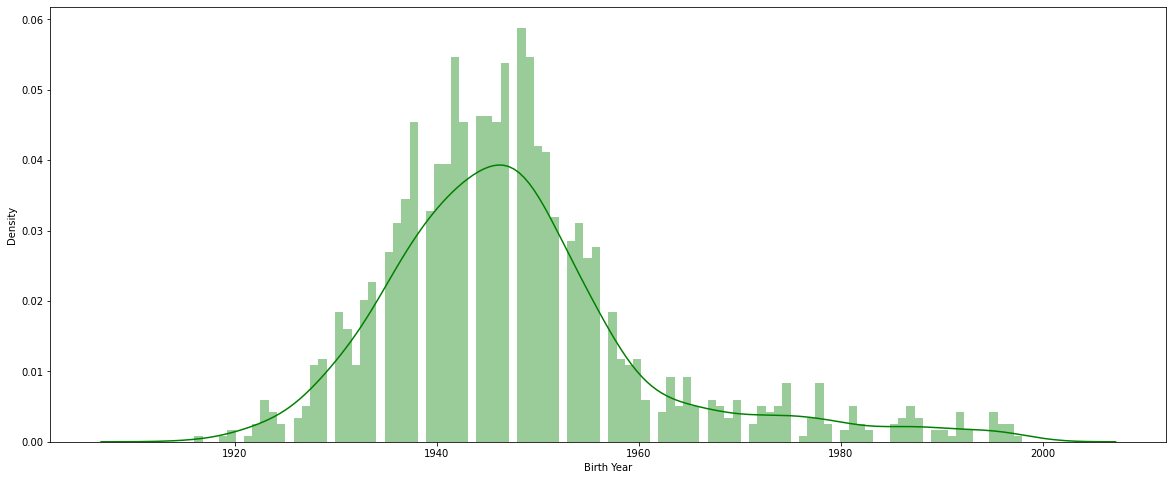

In [25]:
# Distribution of Birth Year.

print(df['Birth Year'].describe())
plt.figure(figsize=(20, 8))
sns.distplot(df['Birth Year'], color='g', bins=100, hist_kws={'alpha': 0.4});

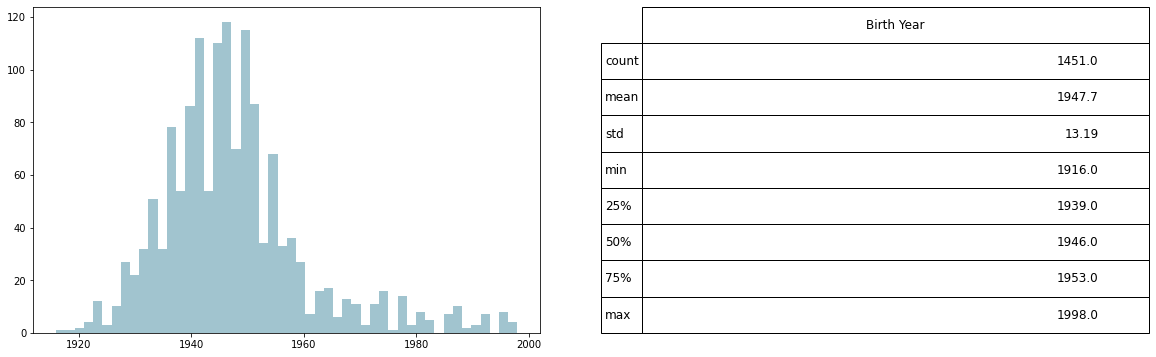

In [26]:
# Another way to plot the distribution of birth year. 

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
ax1.hist(df['Birth Year'], bins=50, color='#a1c4cf')

dfxx = df['Birth Year'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = dfxx.values, rowLabels = dfxx.index, bbox=bbox, colLabels=dfxx.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

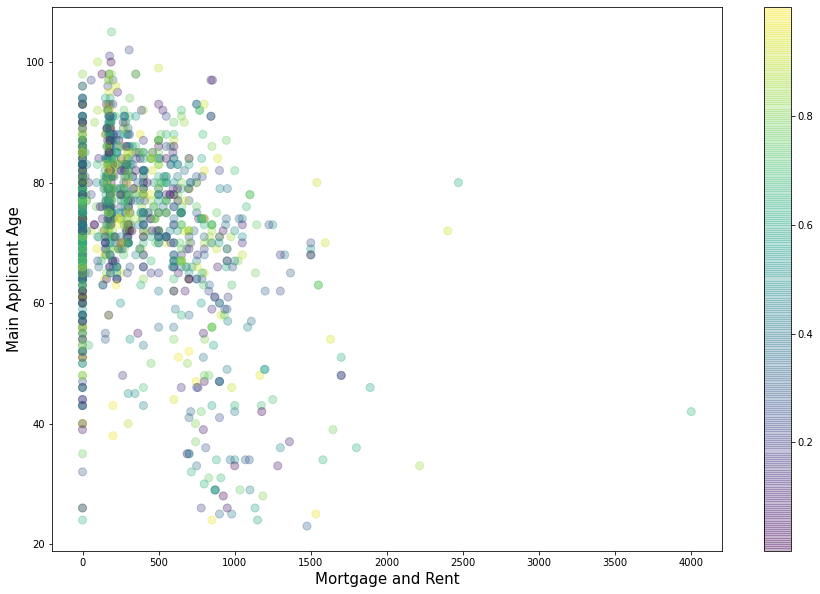

In [28]:
# Plotting Applicant Age vs Mortgage/Rent to see if the amount of rent they're paying have to do with how old they are
import random as rand
np.random.seed(19680801)
N = 1453
colors = np.random.rand(N)
sizes = 1453
fig = plt.figure(figsize=(15,10))


plt.scatter(df['Mortgage/Rent'], df['Applicant Age'], c=colors,s=65, alpha=0.3,
            cmap='viridis')
plt.xlabel("Mortgage and Rent", size=15)
plt.ylabel("Main Applicant Age", size=15)
plt.colorbar(); 

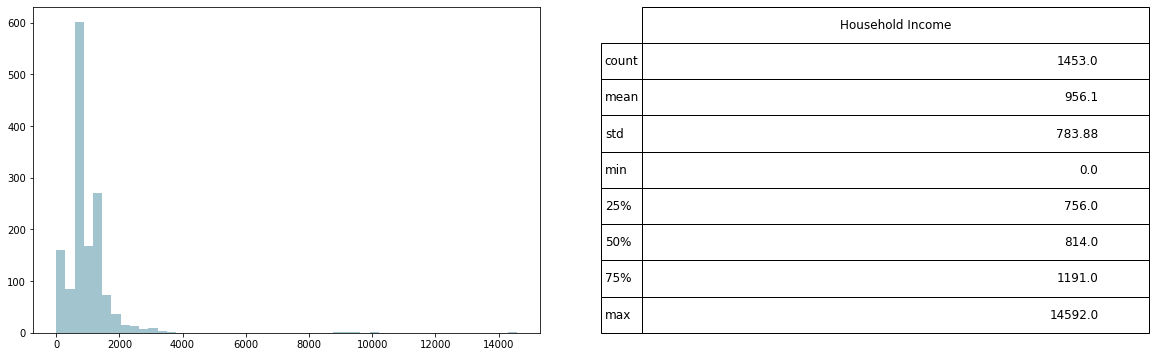

In [29]:
# Distribution of Income

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
ax1.hist(df['Household Income'], bins=50, color='#a1c4cf')

dfxx = df['Household Income'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = dfxx.values, rowLabels = dfxx.index, bbox=bbox, colLabels=dfxx.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

In [ ]:
# Check for household income outliers

# df.loc[df['Household Income'] > 10000]

In [ ]:
# Check for high rents

# df.loc[df['Mortgage/Rent'] > 2000]

Text(0, 0.5, 'Zip Code')

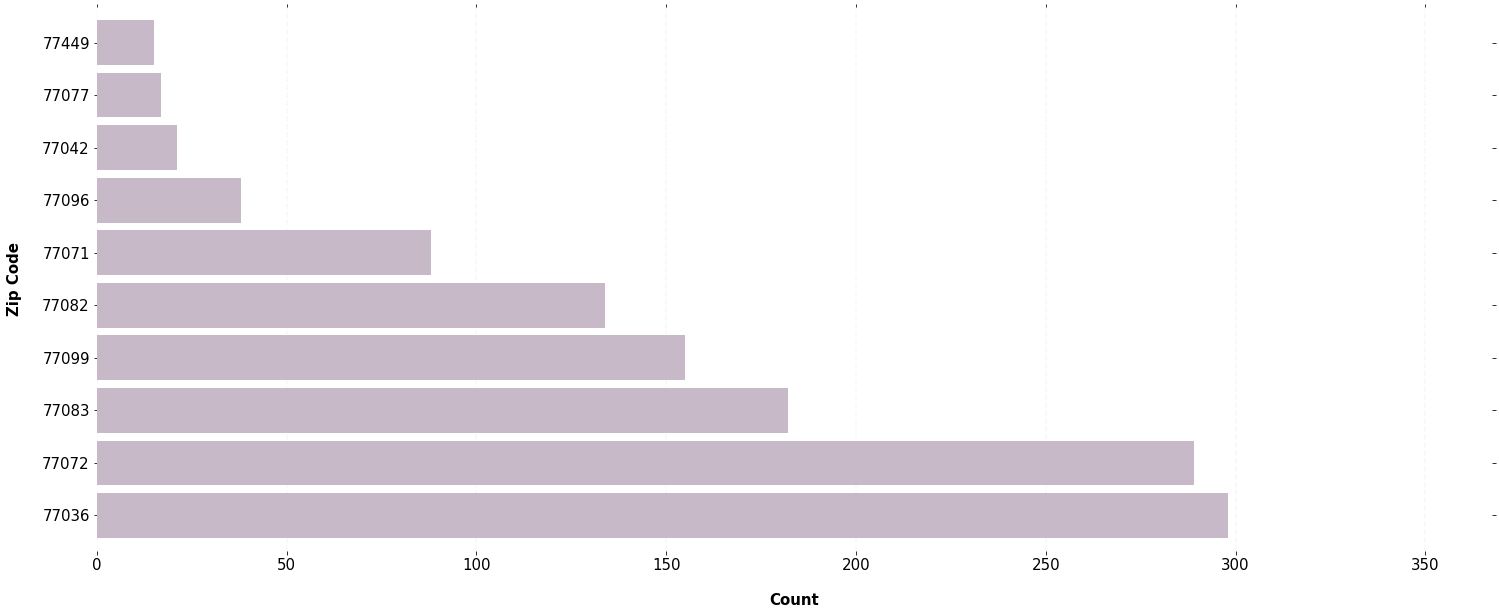

In [30]:
# Top 10 zip code

zip = df['Zip Code'].value_counts().head(10)
ax = zip.plot(kind='barh', figsize=(25, 10), color='#c8b9c9', zorder=2, width=0.85)

#Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Count", labelpad=20, weight='bold', size=15)
ax.set_ylabel("Zip Code", labelpad=20, weight='bold', size=15)

In [31]:
# Race represented

df['Applicant Race and Ethnicity'].value_counts(normalize=True).head(10)*100

Asian                87.258953
Hispanic / Latino     4.820937
Black                 4.683196
Others                1.584022
White                 1.515152
American Indian       0.068871
Two or more races     0.068871
Name: Applicant Race and Ethnicity, dtype: float64

In [32]:
# Owner or Renter

df['Owner/Renter'].value_counts(normalize=True).head(10)*100

Renter    63.567493
Owner     36.432507
Name: Owner/Renter, dtype: float64

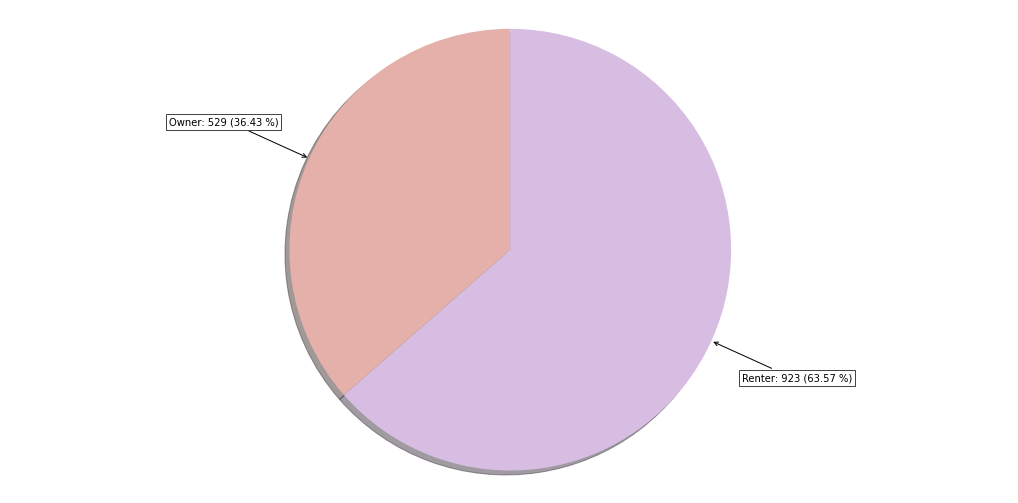

In [33]:
# Owner and Renter Plot

Sector = df.groupby('Owner/Renter').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="->"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [34]:
# Where clients residing at?

df['Type Of House'].value_counts(normalize=True).head(10)*100

Apartment             48.209366
Single Family Home    44.008264
Townhouse              7.300275
Duplex                 0.206612
Mobile Home            0.137741
Others                 0.137741
Name: Type Of House, dtype: float64

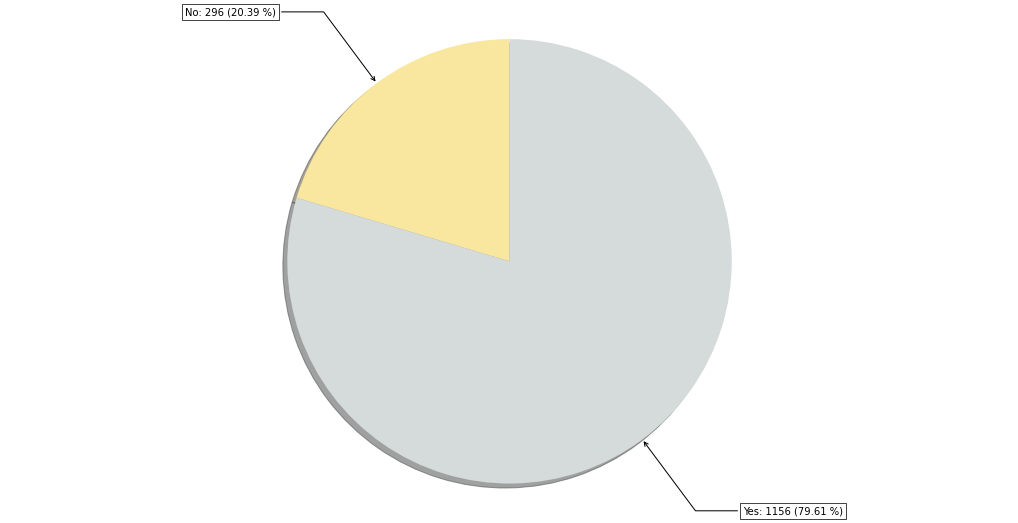

In [35]:
# Do the clients earn an income? 

Sector = df.groupby('Income').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="->"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

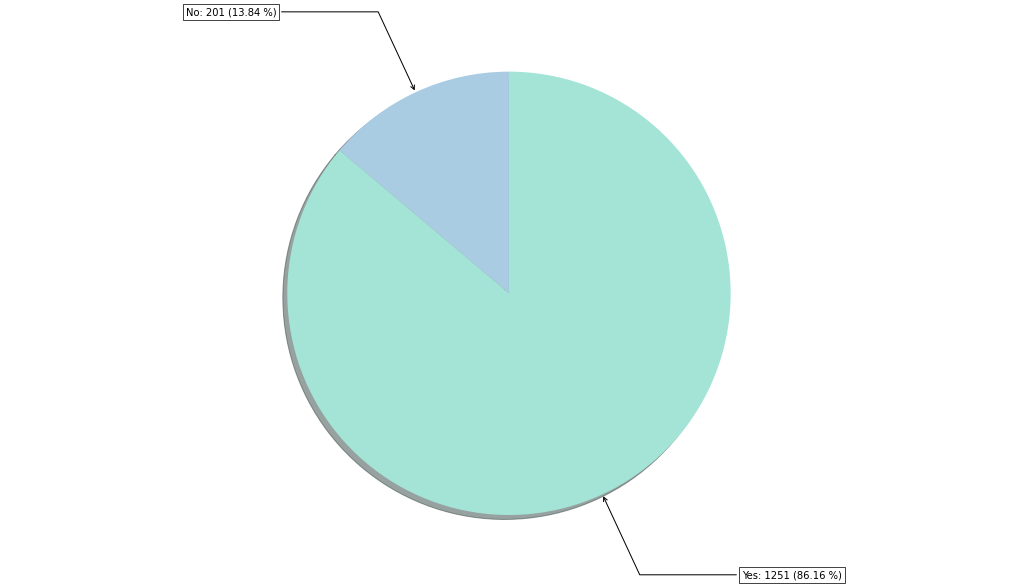

In [36]:
# Are the clients U.S citizen?

Sector = df.groupby('US Citizen').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="->"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [37]:
# Check columns with high correlation

threshold = 0.50

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

high_corr = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns with high correlation greater than 0.5.' % (len(high_corr)))
pd.DataFrame(high_corr)

There are 8 columns with high correlation greater than 0.5.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,0
0,Applicant Age
1,Birth Year - 2
2,Household Member 2 - Age
3,Birth Year - 3
4,Household Member 3 - Age
5,Birth Year - 4
6,Household Member 4 - Age
7,Household Income


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


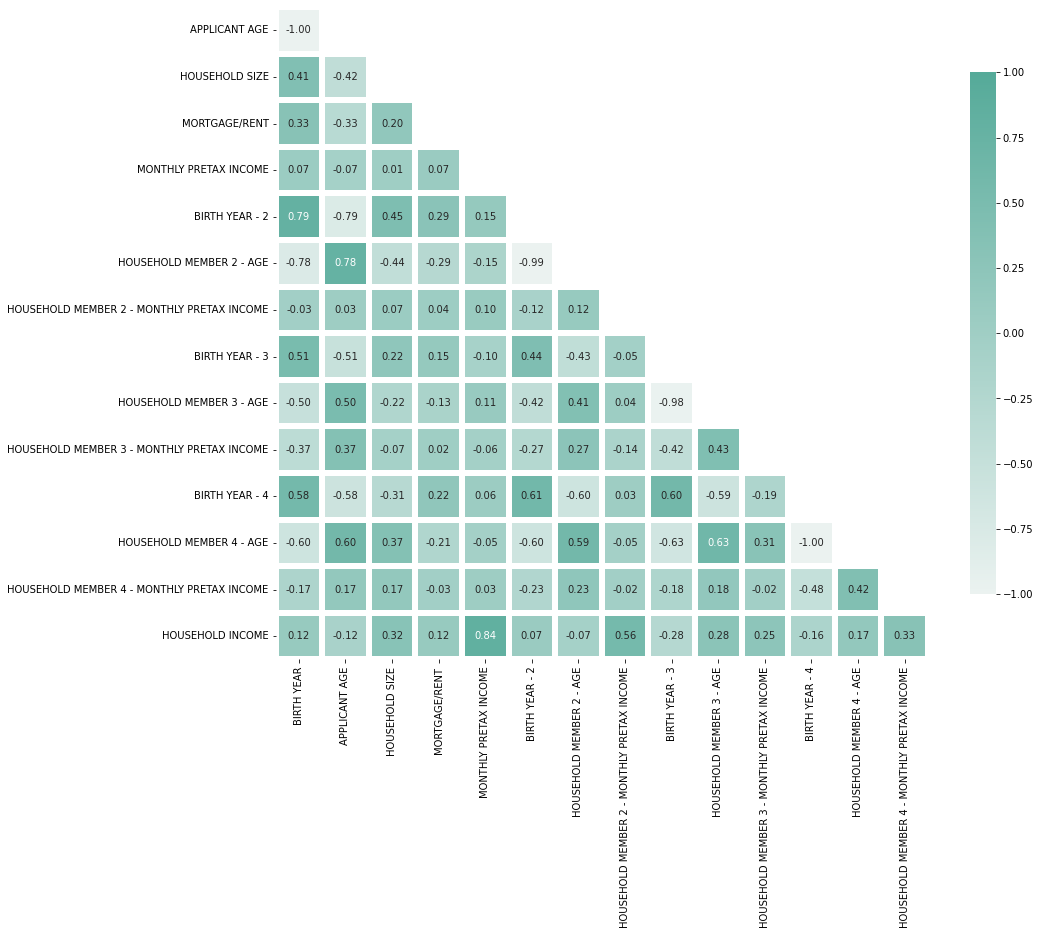

In [38]:
corr = df.corr()

# Correlation heatmap
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

cmap = sns.color_palette("light:#5A9", as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

plt.show()

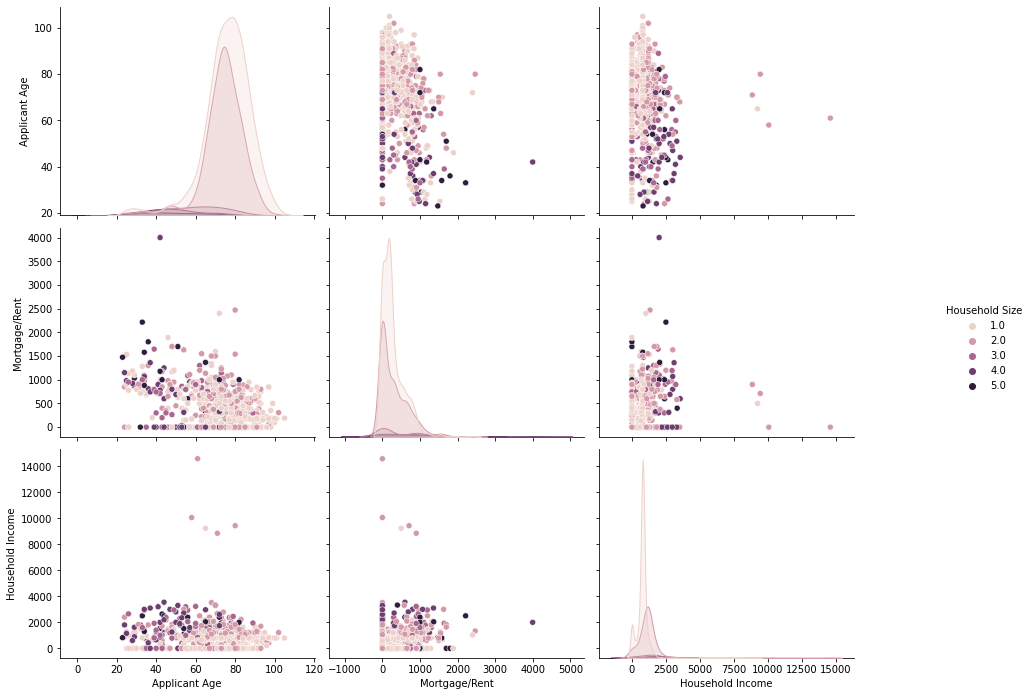

In [54]:
# SNS pairplot 

g=sns.pairplot(df[['Applicant Age', 'Mortgage/Rent', 'Household Income', 'Household Size']], hue='Household Size')
g.fig.set_size_inches(15,10)